## 10台灣股票市場分析統計圖

In [1]:
%matplotlib inline

import requests
import json, csv
import pandas as pd
import os
import time
import matplotlib.pyplot as plt

In [12]:
def convertDate(date):  # 轉換民國日期為西元: 110/01/01 -> 20210101
    str1 = str(date)
    yearstr = str1[:3]
    realyear = str(int(yearstr) + 1911)  # 轉為西元年
    realdate = realyear + str1[4:6] + str1[7:9]  # 組合日期
    return realdate

In [21]:
def twodigit(n):  #將數值轉為二位數字串
    if(n < 10):
        retstr = '0' + str(n)
    else:
        retstr = str(n)
    return retstr

### 單月個股統計圖

In [3]:
#plt.rcParams['font.snas-serif'] = 'mingliu'
plt.rcParams['font.family'] = 'Noto Sans CJK TC' 
plt.rcParams['axes.unicode_minus'] = False

In [5]:
pd.options.mode.chained_assignment = None  # 取消顯示pandas資料重設警告

In [14]:
f = 'stockmonth01.csv'

In [18]:
if not os.path.isfile(f):
    url = 'https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=20210101&stockNo=2317&_=1621172207866'
    request = requests.get(url) # 回傳為json資料
    jdata = json.loads(request.text)  # json解析
    
    outputfile = open(f, 'w', newline='', encoding='utf-8')  #開啟儲存檔案
    outputwriter = csv.writer(outputfile)  #以csv格式寫入檔案
    outputwriter.writerow(jdata['fields'])
    for dataline in (jdata['data']):  #寫入資料
        outputwriter.writerow(dataline)
    outputfile.close()  #關閉檔案

In [19]:
pdstock = pd.read_csv(f, encoding='utf-8')  #以pandas讀取檔案

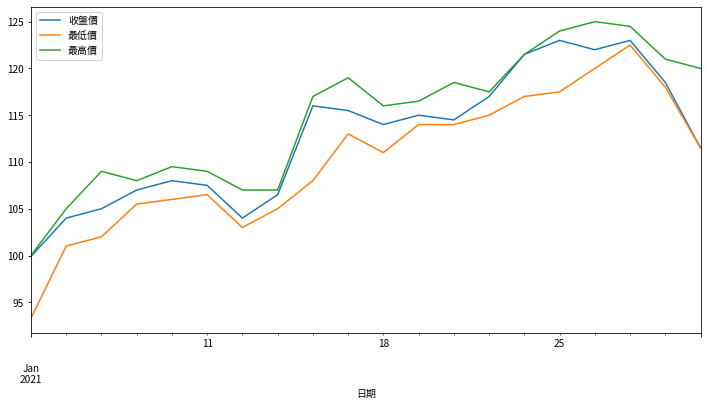

In [20]:
for i in range(len(pdstock['日期'])):  #轉換日期式為西元年格
    pdstock['日期'][i] = convertDate(pdstock['日期'][i])
pdstock['日期'] = pd.to_datetime(pdstock['日期'])  #轉換日期欄位為日期格式
pdstock.plot(kind='line', figsize=(12, 6), x='日期', y=['收盤價', '最低價', '最高價'])  #繪製統計圖

### 全年個股統計圖

In [22]:
urlbase = 'https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=2020'  #網址前半
urltail = '01&stockNo=2317&_=1621172646286'  #網址後半
for i in range(1, 13):  #取1到12數字
    url_twse = urlbase + twodigit(i) + urltail  #組合網址
    print(url_twse)

https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=20200101&stockNo=2317&_=1621172646286
https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=20200201&stockNo=2317&_=1621172646286
https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=20200301&stockNo=2317&_=1621172646286
https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=20200401&stockNo=2317&_=1621172646286
https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=20200501&stockNo=2317&_=1621172646286
https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=20200601&stockNo=2317&_=1621172646286
https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=20200701&stockNo=2317&_=1621172646286
https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=20200801&stockNo=2317&_=1621172646286
https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=20200901&stockNo=2317&_=1621172646286
https://www.twse.com.tw/exchangeReport/STOCK_D

In [23]:
f = 'stockyear2020.csv'

In [25]:
if not os.path.isfile(f):  #如果檔案不存在就建立檔案
    for i in range(1, 13):  #取1到12數字
        url_twse = urlbase + twodigit(i) + urltail  #組合網址
        res = requests.get(url_twse)  #回傳為json資料
        jdata = json.loads(res.text)  #json解析
        
        outputfile = open(f, 'a', newline='', encoding='utf-8')  #開啟儲存檔案
        outputwriter = csv.writer(outputfile)  #以csv格式寫入檔案
        if i==1:  #若是1月就寫入欄位名稱
            outputwriter.writerow(jdata['fields'])
        for dataline in (jdata['data']):  #逐月寫入資料
            outputwriter.writerow(dataline)
        time.sleep(0.5)  #延遲0.5秒,否則有時會有錯誤
    outputfile.close()  #關閉檔案

In [27]:
pdstock = pd.read_csv(f, encoding='utf-8')  #以pandas讀取檔案

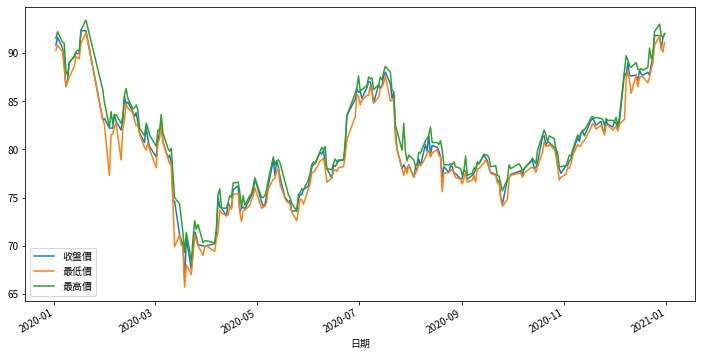

In [28]:
for i in range(len(pdstock['日期'])):  #轉換日期式為西元年格式
    pdstock['日期'][i] = convertDate(pdstock['日期'][i])
pdstock['日期'] = pd.to_datetime(pdstock['日期'])  #轉換日期欄位為日期格式
pdstock.plot(kind='line', figsize=(12, 6), x='日期', y=['收盤價', '最低價', '最高價'])  #繪製統計圖

### 以plotly繪製全年個股統計圖

In [29]:
from plotly.graph_objs import Scatter, Layout
from plotly.offline import plot

In [43]:
f = 'stockyear2020.csv'

In [44]:
pdstock = pd.read_csv(f, encoding='utf-8')  #以pandas讀取檔案

In [45]:
for i in range(len(pdstock['日期'])):  #轉換日期式為西元年格式
    pdstock['日期'][i] = convertDate(pdstock['日期'][i])
pdstock['日期'] = pd.to_datetime(pdstock['日期'])  #轉換日期欄位為日期格式
data = [Scatter(x=pdstock['日期'], y=pdstock['收盤價'], name='收盤價'),
        Scatter(x=pdstock['日期'], y=pdstock['最低價'], name='最低價'),
        Scatter(x=pdstock['日期'], y=pdstock['最高價'], name='最高價')]
plot({"data": data, "layout": Layout(title='2020年個股(2317鴻海)統計圖')},auto_open=True)

'temp-plot.html'